In [266]:
import numpy as np
import matplotlib.pyplot as plt


# основное равнение равновесия

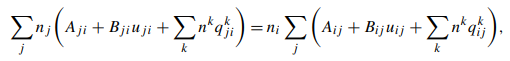

In [267]:
#Матрица спонтанных переходов
A=np.zeros((3,3))
A[1,0]=7.932e-8
A[2,0]=2.054e-14
A[2,1]=2.654e-7
#Энергии уровней
E=np.zeros(3)
E[1]=16.4
E[2]=43.4
# статвеса 
g=np.zeros(3)
g[0]=1
g[1]=3
g[2]=5
#вполне очевидные константы (a is radiation constant)
a=7.56577e-15
h=6.62607e-27
c=2.9979258e10
k=1.38065e-16
#количество записей столкновительных коэффициентов с температурой
n=22
#Столкновительные коэффициенты qss
q01='0.122E-11 0.382E-11 1.400E-11 2.100E-11 2.870E-11 3.680E-11 5.330E-11 6.930E-11 11.080E-11 16.000E-11 19.440E-11 25.860E-11 29.750E-11 37.560E-11 40.410E-11 42.900E-11 47.120E-11 50.680E-11 56.670E-11 59.320E-11 61.800E-11 64.150E-11'
q02='0.0001E-11 0.0001E-11 0.005E-11 0.014E-11 0.033E-11 0.065E-11 0.180E-11 0.372E-11 1.390E-11 4.000E-11 7.035E-11 16.080E-11 23.830E-11 41.190E-11 46.940E-11 51.700E-11 59.450E-11 65.800E-11 76.200E-11 80.670E-11 84.800E-11 88.640E-11'
q12='0.002E-11 0.015E-11 0.132E-11 0.261E-11 0.444E-11 0.678E-11 1.280E-11 2.020E-11 4.610E-11 9.030E-11 13.020E-11 22.590E-11 29.790E-11 45.200E-11 50.410E-11 54.790E-11 62.060E-11 68.120E-11 78.240E-11 82.650E-11 86.750E-11 90.610E-11'
qs=[['',q01,q02],[q01,'',q12],[q02,q12,'']]
qss=np.zeros((3,3,n))
for i in range(3):
  for j in range(3):
    if i!=j:
      qss[i][j]=np.array([float(qx) for qx in qs[i][j].split()])
#для данных значений температуры
Ts='4 5 7 8 9 10 12 14 20 30 40 70 100 200 250 300 400 500 700 800 900 1000'
T=np.array([float(t) for t in Ts.split()])

# Второе слагаемое

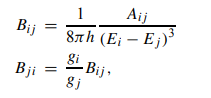

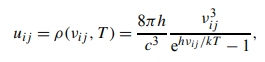

In [268]:
#Матрица переходов от излучения
def getBu(A,T):
  B=np.zeros((3,3))
  for i in range(3):
    for j in range(3):     
      if i>j:
        dE=np.abs(E[i]-E[j])
        # uv=8*np.pi*h*(dE**3)/(np.exp(h*c*dE/(k*T))-1)
        ng=1/(np.exp(h*c*dE/(k*T))-1)
        B[i,j]=A[i,j]*ng
      if j>i: 
        dE=np.abs(E[i]-E[j])
        # uv=8*np.pi*h*(dE**3)/
        ng=1/(np.exp(h*c*dE/(k*T))-1)
        B[i,j]=A[j,i]*ng*g[j]/g[i]
  return B

# B=A*ng+(A.T)*ng*
getBu(A,100)

array([[0.00000000e+00, 8.94173624e-07, 1.18429934e-13],
       [2.98057875e-07, 0.00000000e+00, 9.31773034e-07],
       [2.36859869e-14, 5.59063820e-07, 0.00000000e+00]])

#переходы от столкновений

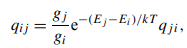


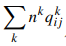

In [269]:
def getnC(qs,t,nH): 
  q=np.zeros((3,3))
  for i in range(3):
    for j in range(3):
      if i<j:
        q[i,j]=nH*qs[i,j]
      if i>j:
        b=np.exp( (E[i]-E[j])*h*c / (k*t) ) * (g[j]/g[i]) 
        q[i,j]=nH*b*qs[j,i]
  return(q)


getSolve получает отношения n_13, n_12 для заданных температуры и концентрации водородов

In [270]:
def getSolve(item,nH):
  t=T[item]
  Q=A+getBu(A,t)+getnC(qss[:,:,item],t,nH)
  Qnew=Q.transpose()-sum(Q.transpose())*np.identity(3)
  M=Q[1:,1:]
  I=np.zeros(2)
  I[0]=-P[1,1]
  I[1]=-P[2,1]
  ys=np.linalg.solve(M,I)
  return(ys)


# массив отношений при разных температурах



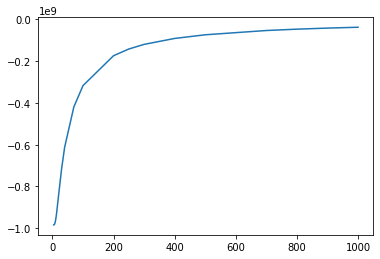

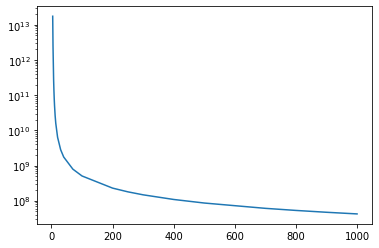

In [271]:
def x21T(nH):
  y=[]
  z=[]
  for i in range(n):
    y.append(getSolve(i,1)[0])
    z.append(getSolve(i,1)[1])
  return([y,z])

plt.plot(T,x21T(1)[0])
plt.show()
plt.semilogy(T,x21T(1)[1])


# массив отношений при разных концентрациях


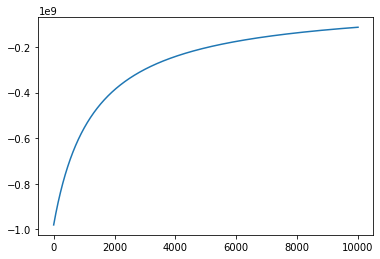

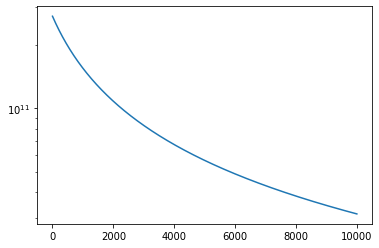

In [272]:
# массив отношений разных концентраций
m=10000
def x21n(t):
  y=[]
  z=[]
  for i in range(m):
    y.append(getSolve(2,i)[0])
    z.append(getSolve(2,i)[1])
  return([y,z])

# plt.semilogy(range(m),x21n(100))
plt.plot(range(m),x21n(100)[0])
plt.show()
plt.semilogy(range(m),x21n(100)[1])